# Project Report
## Identify areas or streets with the highest frequency of parking violations in Bonn, Germany

### Summary

This project aims to analyze parking violation data in Bonn to identify areas or streets with the highest frequency of parking violations. By integrating this information with the street directory dataset, the project will create a visualization and provide data-driven insights on parking violation hotspots. The results can assist urban planners, law enforcement agencies, and parking management companies in taking appropriate actions, such as improving signage, increasing patrolling, or adjusting parking regulations in those areas.

### Rationale

Parking violations are a common issue in urban areas, causing inconvenience to residents and visitors. By identifying parking violation hotspots, stakeholders can prioritize their efforts and resources to address the problem effectively. Understanding the areas or streets with the highest frequency of violations can help urban planners optimize parking infrastructure, law enforcement agencies enhance enforcement strategies, and parking management companies implement targeted solutions. This data-driven approach enables evidence-based decision-making and efficient allocation of resources.

### Datasources

#### Datasource1: Parking Violation Data
* Metadata URL: https://mobilithek.info/offers/-4923391267684416470
* Data URL: https://opendata.bonn.de/sites/default/files/Parkverst%C3%B6%C3%9Fe%202021.csv
* Data Type: CSV

The parking violation dataset contains information about the date, time, location, and type of parking violations in Bonn. It provides a comprehensive record of parking offenses and serves as the primary data source for identifying hotspots.

#### Datasource2: Street Directory Data
* Metadata URL: https://mobilithek.info/offers/-6188776794721161982
* Data URL: https://stadtplan.bonn.de/csv?Thema=17790
* Data Type: CSV

The street directory dataset contains information about the streets, roads, and intersections in Bonn, including their names, locations, and characteristics. Integrating this dataset with the parking violation data will enable the identification of specific streets or areas where parking violations occur frequently.


### Project Flow

#### 1. Data Acquisition:
* Set up a mechanism to fetch the parking violation data from the provided data source.
* Set up a mechanism to fetch the street directory data from the provided data source.


##### 2. Data Preprocessing:
* Clean and preprocess the parking violation data, removing any irrelevant or inconsistent entries.
* Clean and preprocess the street directory data, ensuring data quality and consistency.


####  3. Data Integration:
* Combine the parking violation data with the street directory data based on location information.
* Perform data merging and consolidation to create a unified dataset for analysis.


#### 4. Exploratory Data Analysis:
* Conduct exploratory data analysis on the merged dataset.
* Identify statistical patterns and trends in parking violations.


## Use dependencies


In [1]:
import numpy as np
import pandas as pd
import sqlite3
import plotly.express as px
import matplotlib.pyplot as plt
import folium

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Load data
Create a pandas dataframe using the local sqlite file.

In [2]:
conn = sqlite3.connect('traffic_violation.sqlite')
parking_df = pd.read_sql_query("SELECT * FROM parking_violations", conn)
street_df = pd.read_sql_query("SELECT * FROM street_directory", conn)
merged_df = pd.merge(parking_df, street_df, left_on='Crime_Str_No', right_on='Street_Number', how='inner')
grouped_df = merged_df.groupby(['Crime_Str_No', 'Street_Number', 'Street_Name', 'latitude', 'longitude']).size().reset_index(name='Total Violations')


#### 5. Hotspot Identification:
* Apply clustering or spatial analysis techniques to identify areas or streets with the highest frequency of parking violations.
* Determine the criteria for defining parking violation hotspots based on the analysis results.

In [6]:
# Step 4: Create a scatter plot
fig = px.scatter(grouped_df, x='Street_Number', y='Street_Name', size='Total Violations', color='Total Violations')

# Step 5: Display the plot
fig.show()  # Use this for plotly



#### 6. Visualization and Insights:
* Create visualizations, such as maps or heatmaps, to illustrate the identified parking violation hotspots.


## Identify areas or streets with the highest frequency of parking violations in Bonn?
To answer our initial question, we use folium map to draw a CircleMarker on all Streets with numbers of Parking violations in the dataset, overlaying it on a map from OpenStreetMap.



In [4]:
# Sample data
data = grouped_df

# Convert data to DataFrame
df = pd.DataFrame(data)

# Specify the latitude and longitude to center the map
center_latitude = df['latitude'][0]
center_longitude = df['longitude'][0]

# Create a folium map and set its center location
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=13)

# Add circles to the map
for index, row in df.iterrows():
    street_name = row['Street_Name']
    total_violations = row['Total Violations']
    
    # Create a pop-up message with street_name and Total Violations
    popup_message = f"Street Name: {street_name}<br>Total Violations: {total_violations}"
    
    # Add circle marker with pop-up to the map
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['Total Violations'] * 0.25,  # Adjust the size scaling factor as needed
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.5,
        popup=popup_message
    ).add_to(m)

# Save the map to an HTML file
m.save('map.html')

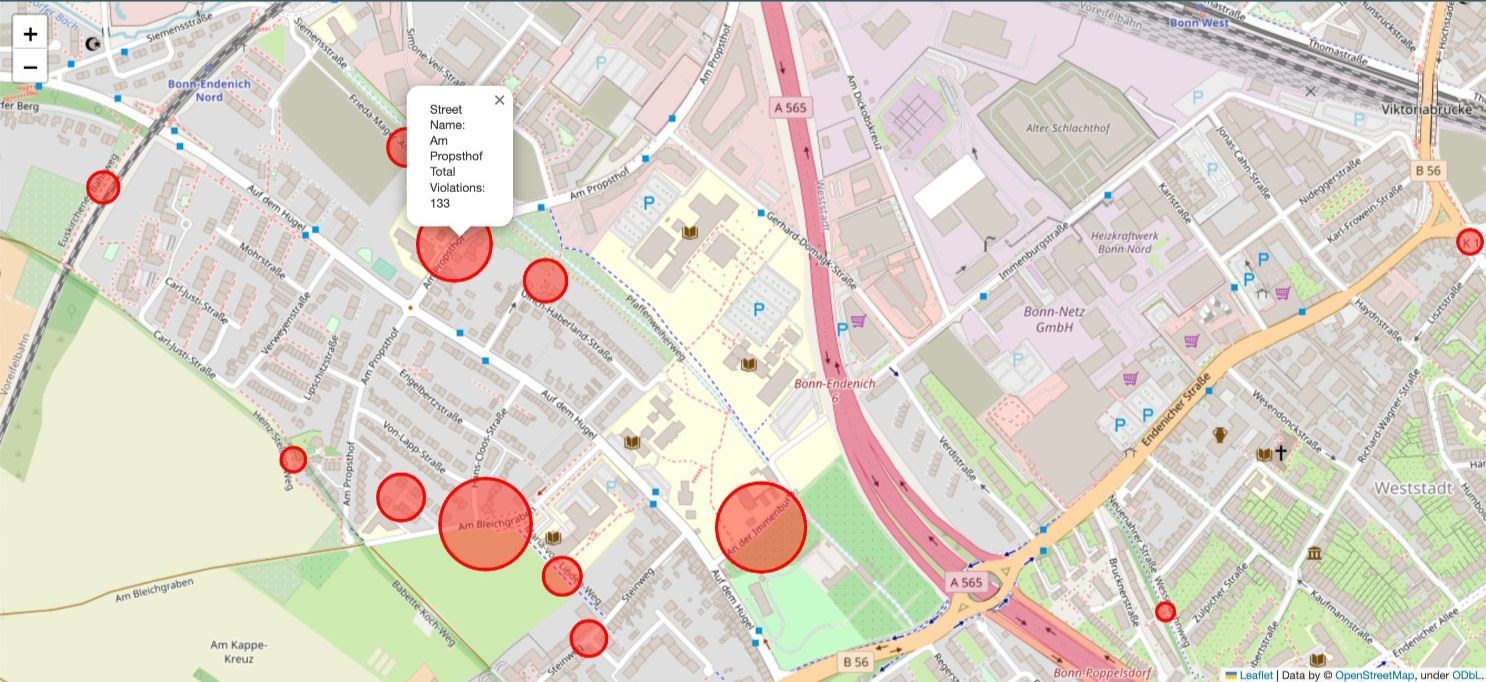

In [2]:
from IPython import display
display.Image("images/P1.jpeg")


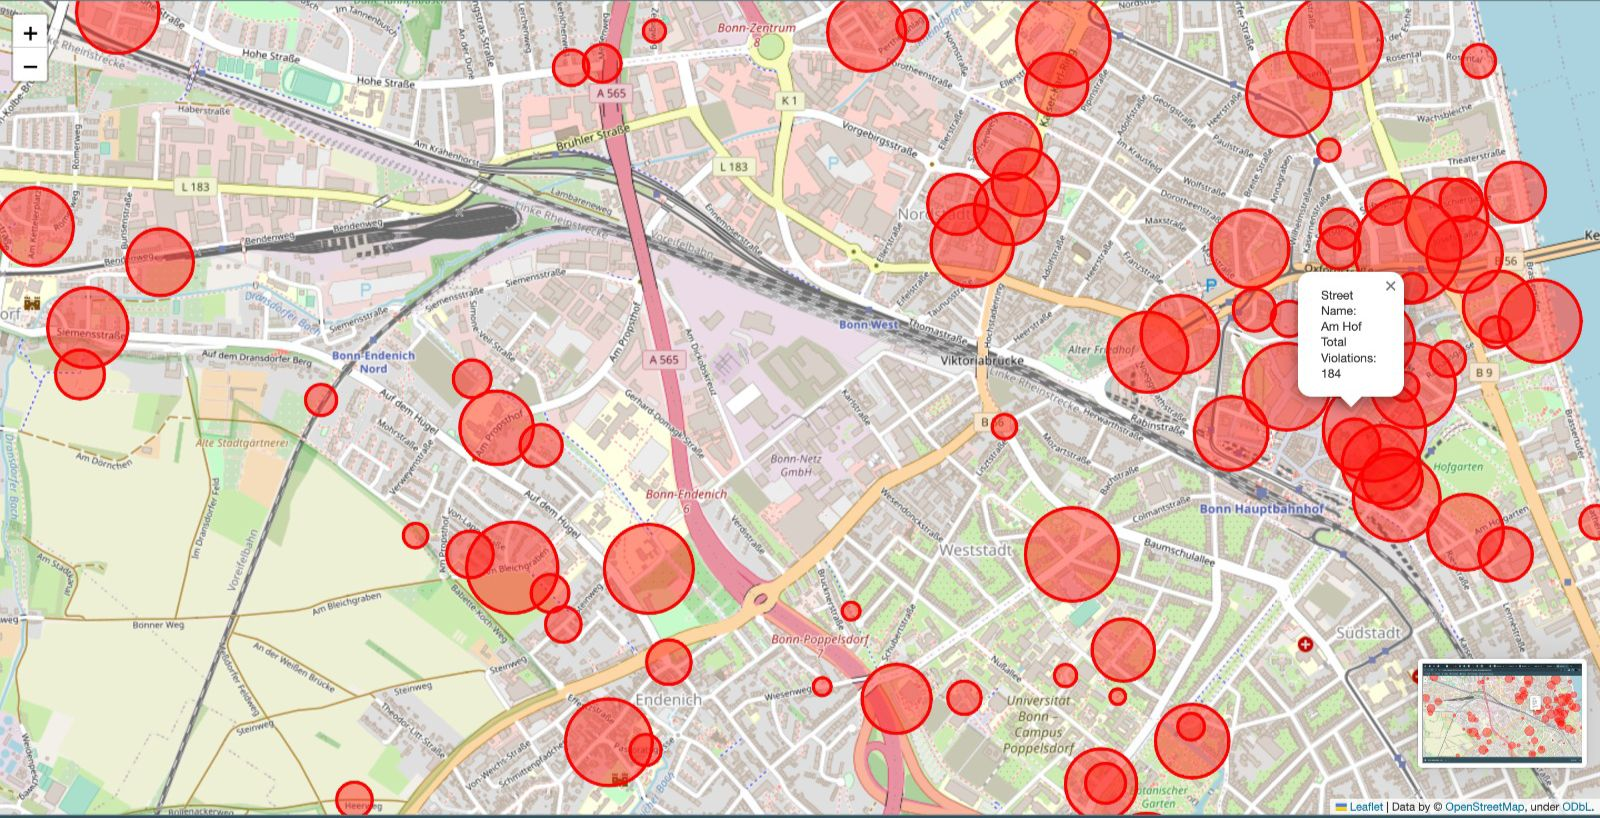

In [3]:
display.Image("images/P2.jpeg")


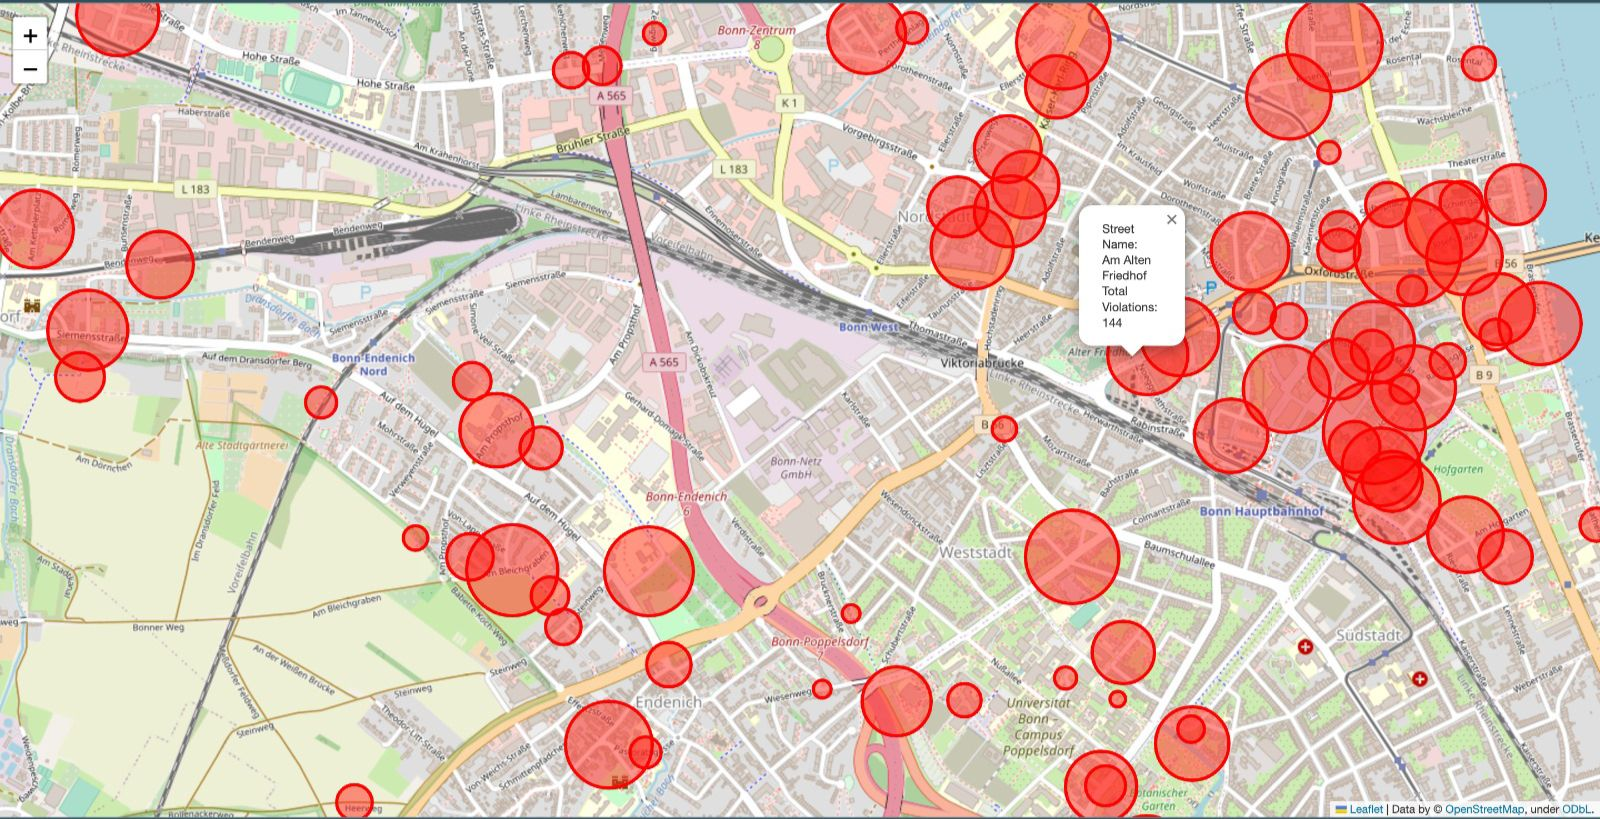

In [4]:
display.Image("images/P3.jpeg")